In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_feather('../data/df_btc_eth_with_features.feather')

In [22]:
quantile = df.groupby(['token'])['target_15m'].quantile(q = [0.0005, 0.1, 0.5, 0.9, 0.9995])

In [23]:
all_quantile = df['target_15m'].quantile(q = [0.0005, 0.1, 0.25, 0.35, 0.5, 0.65, 0.75, 0.9, 0.9995])

In [11]:
min_btc, max_btc = quantile['BTCUSDT'].loc[0.0005], quantile['BTCUSDT'].loc[0.9995]
min_eth, max_eth = quantile['ETHUSDT'].loc[0.0005], quantile['ETHUSDT'].loc[0.9995]

In [12]:
min_btc

-0.040316576058196635

In [13]:
df.loc[(df['token'] == 'BTCUSDT') & (df['target_15m'] < min_btc), 'target_15m'] = min_btc
df.loc[(df['token'] == 'BTCUSDT') & (df['target_15m'] > max_btc), 'target_15m'] = max_btc

df.loc[(df['token'] == 'ETHUSDT') & (df['target_15m'] < min_eth), 'target_15m'] = min_eth
df.loc[(df['token'] == 'ETHUSDT') & (df['target_15m'] > max_eth), 'target_15m'] = max_eth

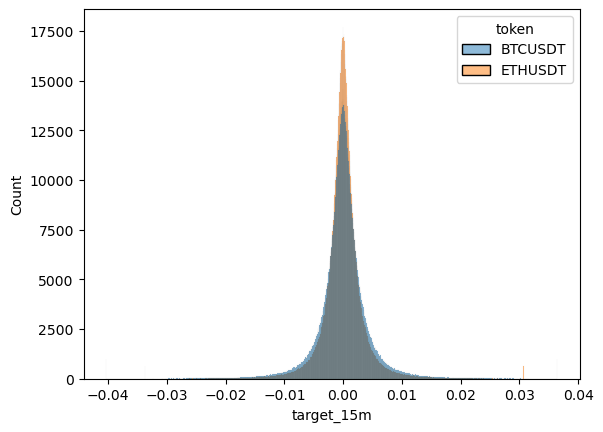

In [14]:
ax = sns.histplot(x = 'target_15m', hue = 'token', data = df)
plt.show()

In [20]:
all_quantile

0.0005   -0.037434
0.1000   -0.003706
0.2500   -0.001488
0.3500   -0.000770
0.5000    0.000012
0.6500    0.000808
0.7500    0.001538
0.9000    0.003766
0.9995    0.034074
Name: target_15m, dtype: float64

In [34]:
df['label'] = 0
df.loc[(df['target_15m'] <= -0.002), 'label'] = 1
df.loc[(df['target_15m'] >= 0.002), 'label'] = 2

In [35]:
df['date'] = df['open_time'].dt.date

In [40]:
count = df.groupby(['token', 'date'])['label'].value_counts(normalize = True)

In [42]:
count_df = count.unstack()

In [51]:
btc_df = {}
eth_df = {}
for i in range(3):
    btc_df[i] = count_df.loc[('BTCUSDT', slice(None)), i]
    eth_df[i] = count_df.loc[('ETHUSDT', slice(None)), i]

In [46]:
import matplotlib.pyplot as plt

In [47]:
btc_df[0].head()

token    date      
BTCUSDT  2020-01-01    0.757639
         2020-01-02    0.791667
         2020-01-03    0.584028
         2020-01-04    0.761806
         2020-01-05    0.728472
Name: 0, dtype: float64

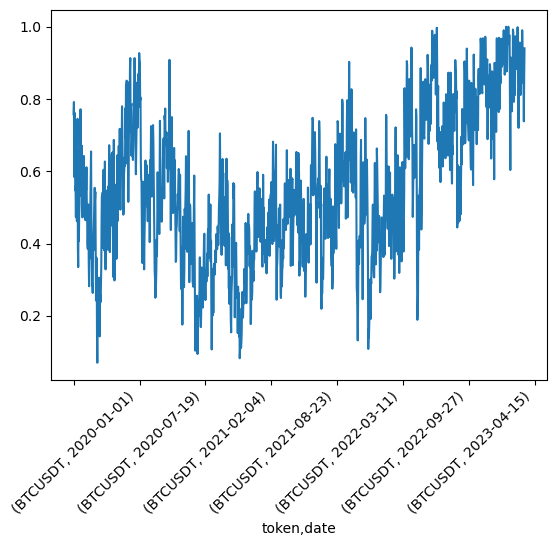

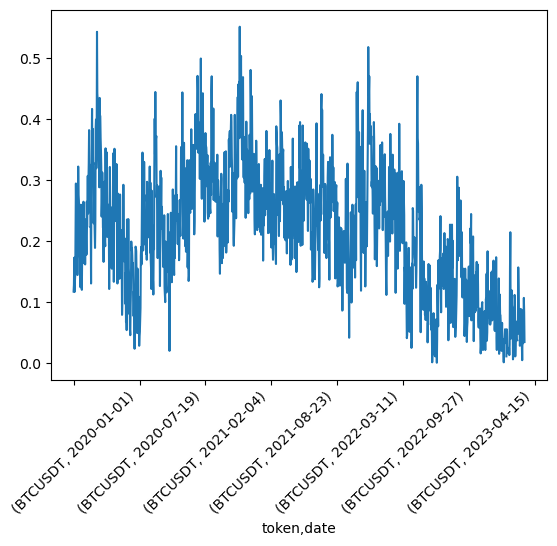

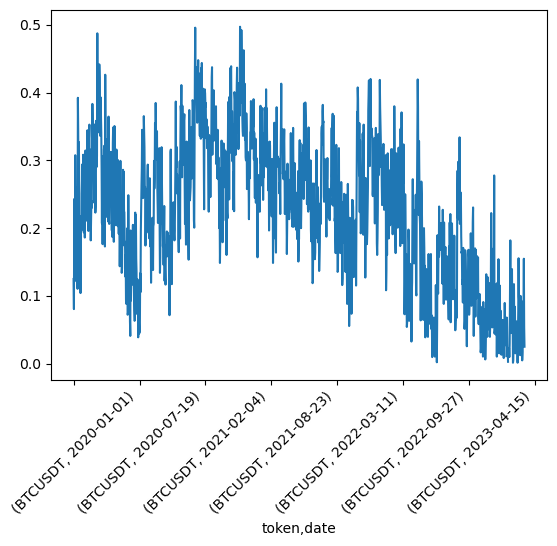

In [50]:
for k, v in btc_df.items():
    ax = v.plot(x = 'date', y = 0, rot = 45)
    plt.show()

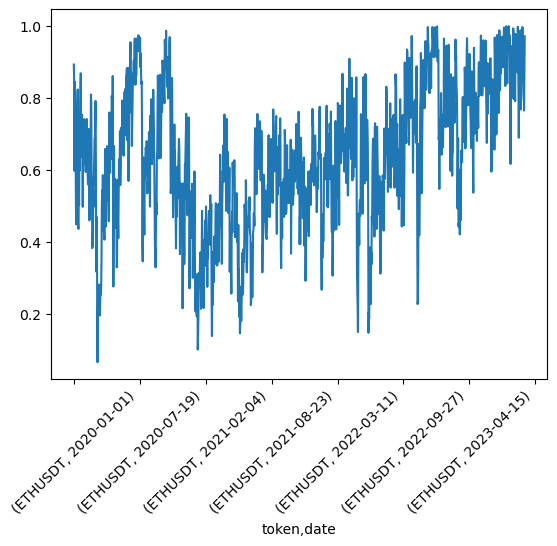

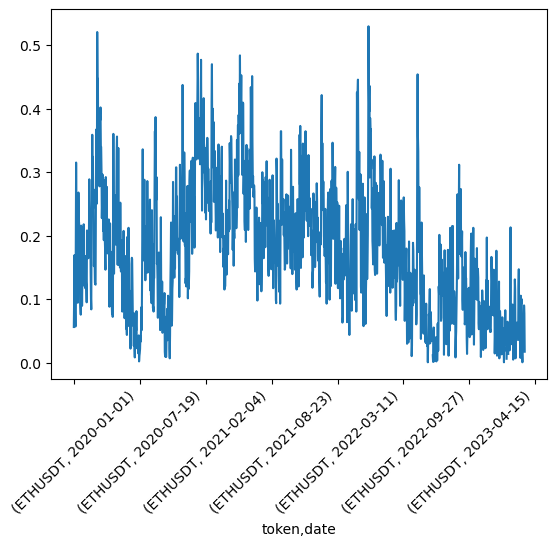

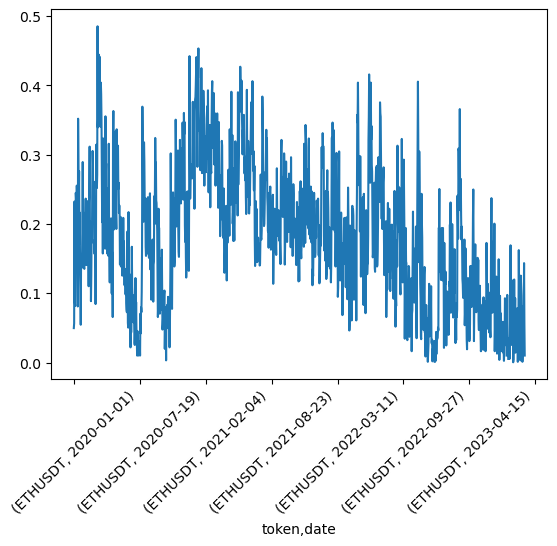

In [52]:
for k, v in eth_df.items():
    ax = v.plot(x = 'date', y = 0, rot = 45)
    plt.show()

In [ ]:
df_btc_cnt = df.loc[(df['token'] == 'BTCUSDT'), ['open_time', 'label', 'target_15m']]

df_btc_cnt['blocks'] = df_btc_cnt['label'].ne(df_btc_cnt['label'].shift()).cumsum()
df_btc_cnt['result'] = df_btc_cnt.groupby('blocks').transform('size')

In [72]:
df_btc_cnt

,open_time,label,target_15m,count_1
0,2020-01-01 00:00:00,0,0.000078,684155
2,2020-01-01 00:01:00,0,-0.000698,684155
4,2020-01-01 00:02:00,0,-0.000699,684155
6,2020-01-01 00:03:00,0,-0.001165,684155
8,2020-01-01 00:04:00,0,0.000078,684155
...,...,...,...,...
3942711,2023-09-30 23:55:00,0,NaN,684155
3942713,2023-09-30 23:56:00,0,NaN,684155
3942715,2023-09-30 23:57:00,0,NaN,684155
3942717,2023-09-30 23:58:00,0,NaN,684155
